In [5]:
%pylab inline
import pandas as pd
import fastparquet 
import os,sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
sys.path.insert(0,"/mnt/lanlep2019/src/main")

In [3]:
!ln -s /mnt/lanlep2019 ~/

ln: failed to create symbolic link ‘/home/hadoop/lanlep2019’: File exists


In [4]:
os.chdir("/mnt/lanlep2019/")

In [7]:
!pwd

/mnt/lanlep2019


# once

In [3]:
!pip install bayesian-optimization

  Running setup.py bdist_wheel for bayesian-optimization ... done
  Stored in directory: /home/hadoop/.cache/pip/wheels/1d/0d/3b/6b9d4477a34b3905f246ff4e7acf6aafd4cc9b77d473629b77
Successfully built bayesian-optimization
You are using pip version 9.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# data

In [8]:
import lightgbm as lgb

In [9]:
import data
import config

In [10]:
reload (data)

<module 'data' from '/mnt/lanlep2019/src/main/data.pyc'>

In [11]:
if 1:
    strategy = {'type':'byquake', "test_quakes":[[ 9,  4,  6] , [15,  1,  5], [10, 14,  3],  [7, 11,  2],  [8, 13, 12]]}
    types=['kaggle','signal','kaggle2'] +['fwv','fwvext']+['fwvsoftmax','fwvdis','fwvdis2','fwvcos']+\
        ['fwvextsoftmax','fwvextdis','fwvextdis2','fwvextcos'] + ['fwvwholereg', 'fwvextwholereg']
    traintest = data.TrainTest('dense', coverages=None, types=types, transform=None, valid_strategy=strategy)

In [12]:
traintest.num_dataset()

5

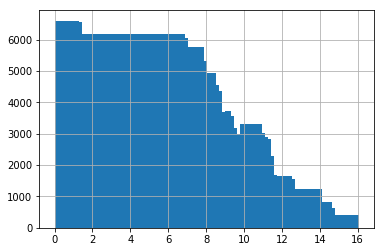

In [13]:
traintest.ydf.hist(bins=100);

In [14]:
np.abs(traintest.ydf-traintest.ydf.median()).mean()

3.02918898210172

In [15]:
testdf=traintest.get_test_data()
testdf.shape

(2624, 450)

In [16]:
datadf=traintest.traindf
datadf.head()

mean        std    max    min  mean_change_abs  \
index                                                                      
quake_03_0200_105000  4.364120   6.262442  119.0 -119.0         0.000000   
quake_06_0120_099000  4.220713  10.566183  328.0 -282.0         0.000007   
quake_07_0296_013500  4.430427   7.501472  159.0 -116.0        -0.000007   
quake_03_0090_034500  4.798247   4.658487  108.0  -76.0         0.000013   
quake_08_0137_055500  4.691327   5.605683  172.0 -171.0        -0.000007   

                      mean_change_rate  abs_max  abs_min  std_first_50000  \
index                                                                       
quake_03_0200_105000      75149.867188    119.0      0.0         4.398645   
quake_06_0120_099000      75124.750000    328.0      0.0         4.937372   
quake_07_0296_013500      74910.898438    159.0      0.0         7.806824   
quake_03_0090_034500      74906.742188    108.0      0.0         5.020636   
quake_08_0137_055500      74864.296875    172.0      0.0         7.771729   

                      std_last_50000       ...         fwvextdis_pca10_2  \
index                                      ...                             
quake_03_0200_105000        7.115628       ...                 -0.867152   
quake_06_0120_099000       17.188982       ...                  0.599042   
quake_07_0296_013500        8.044850       ...                  0.276776   
quake_03_0090_034500        4.439272       ...                 -1.211162   
quake_08_0137_055500        4.222545       ...                 -1.418130   

                      fwvextdis_pca10_3  fwvextdis_pca10_4  fwvextdis_pca10_5  \
index                                                                           
quake_03_0200_105000           0.251729           0.083587           0.029462   
quake_06_0120_099000          -0.058171          -0.059255           0.019930   
quake_07_0296_013500          -0.041059           0.105883           0.042710   
quake_03_0090_034500           0.021516          -0.055162           0.053457   
quake_08_0137_055500          -0.099060          -0.037935          -0.052247   

                      fwvextdis_pca10_6  fwvextdis_pca10_7  fwvextdis_pca10_8  \
index                                                                           
quake_03_0200_105000          -0.022975          -0.039655           0.000274   
quake_06_0120_099000           0.002073           0.007824          -0.008991   
quake_07_0296_013500          -0.009792          -0.018473           0.035101   
quake_03_0090_034500          -0.030760          -0.066036           0.022193   
quake_08_0137_055500           0.054380          -0.019536           0.042780   

                      fwvextdis_pca10_9  fwv_wholereg  fwvext_wholereg  
index                                                                   
quake_03_0200_105000           0.028007     93.940635        -6.822180  
quake_06_0120_099000           0.020008     20.000997       -12.672698  
quake_07_0296_013500          -0.005669     37.947210       -38.633617  
quake_03_0090_034500           0.016614     80.679887        11.746026  
quake_08_0137_055500           0.010705     53.077711         4.727631  

[5 rows x 450 columns]

In [17]:
ydf=traintest.ydf
ydf.head()

index
quake_03_0200_105000    0.998098
quake_06_0120_099000    2.318898
quake_07_0296_013500    4.532197
quake_03_0090_034500    5.302996
quake_08_0137_055500    2.514399
Name: y, dtype: float64

In [18]:
qdf=pd.DataFrame(datadf.index.map(lambda u: u.split("_")[1]).astype(np.int8),index=datadf.index)
qdf.head()

index
index                      
quake_03_0200_105000      3
quake_06_0120_099000      6
quake_07_0296_013500      7
quake_03_0090_034500      3
quake_08_0137_055500      8

In [19]:
qdf['index'].value_counts().to_frame().sort_index().T

0      1      2      3      4      5      6      7      8      9   \
index  3672  29520  36295  22631  32480  20574  18018  41240  20192  24635   

          10     11     12     13     14     15    16  
index  29228  28196  22560  21885  37761  24179  4674

In [20]:
qdf.shape,ydf.shape,datadf.shape

((417740, 1), (417740,), (417740, 450))

In [21]:
quakes=range(1,16)
quakes

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

In [22]:
idx=qdf['index'].isin(set(quakes)).values
ydf=ydf[idx]
qdf=qdf[idx]
datadf=datadf[idx]

In [23]:
qdf.shape,ydf.shape,datadf.shape

((409394, 1), (409394,), (409394, 450))

In [24]:
quake_duration= config.quake_length
quake_duration

{1: 11.540566395569977,
 2: 14.180203599212305,
 3: 8.856243408447243,
 4: 12.693878224447909,
 5: 8.05509606419685,
 6: 7.059247509412199,
 7: 16.107000305270187,
 8: 7.906144318432936,
 9: 9.637176132666621,
 10: 11.4267247041647,
 11: 11.0245547308509,
 12: 8.828581201128031,
 13: 8.565787763958841,
 14: 14.7515396785698,
 15: 9.459497978791095}

In [25]:
for qno in quakes:
    r=11/quake_duration[qno]
    print qno, r
    ydf.loc[qdf['index']==qno] *= r

1 0.95315945708
2 0.775729341475
3 1.24206161605
4 0.866559439558
5 1.36559513534
6 1.55823973948
7 0.682932873379
8 1.39132294542
9 1.14141319496
10 0.962655553957
11 0.997772723575
12 1.24595331338
13 1.28417844373
14 0.745684873558
15 1.16285240767


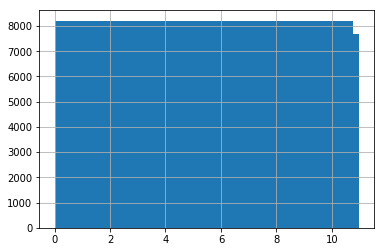

In [26]:
ydf.hist(bins=50);

In [27]:
import utils
n_thread= utils.get_num_thread()
n_thread

35

In [28]:
from bayes_opt import BayesianOptimization


In [29]:
def train_quake(qno,params,n_thread):
    assert(qno in quakes)
    print 'valid quake', qno
    teidx=(qdf['index']==qno).values
    tridx=~qdf['index'].isin({qno,0,16}).values
    
    Xtr,ytr,Xte,yte=datadf[tridx],ydf[tridx],datadf[teidx],ydf[teidx],
    Xtr,ytr,Xte,yte=[u.values for u in [Xtr,ytr,Xte,yte]]
    print Xtr.shape,ytr.shape,Xte.shape,yte.shape
    model = lgb.LGBMRegressor(n_estimators = 5000, n_jobs = n_thread, **params)
    model.fit(Xtr, ytr, 
                    eval_set=[(Xtr, ytr), (Xte, yte)], eval_metric='mae',
                    verbose=100, early_stopping_rounds=100)
    return model.best_score['valid_1']['l1'], model.best_iteration

In [30]:
params = {'num_leaves': 54,
          'min_data_in_leaf': 79,
          'objective': 'mae',
          'max_depth': -1,
          'learning_rate': 0.01,
          "boosting": "gbdt",
          "bagging_freq": 5,
          "bagging_fraction": 0.8126672064208567,
          "bagging_seed": 11,
          "metric": 'mae',
          "verbosity": -1,
          'reg_alpha': 0.1302650970728192,
          'reg_lambda': 0.3603427518866501
         }

In [31]:
best_mae=1e10

In [32]:
def lgbcv(num_leaves,reg_alpha,reg_lambda,max_depth,subsample,colsample_bytree, min_data_in_leaf,min_sum_hessian_in_leaf):
    d=locals()
    newparams=params.copy()
    newparams.update(d)    
    newparams['num_leaves']=int(num_leaves)
    newparams['max_depth']=int(max_depth)
    newparams['min_data_in_leaf']=int(min_data_in_leaf)
    scores=[]
    validScores={}
    for qno in quakes:
        s=train_quake(qno,newparams,n_thread)
        print "quake ", qno,s
        validScores[qno]=s
        scores.append(s[0])
    r=np.mean(scores)
    global best_mae
    if best_mae>r: best_mae=r
    print "mean score", r
    return -r

In [33]:
from bayes_opt.observer import JSONLogger
from bayes_opt.event import Events

In [34]:
bo=BayesianOptimization(lgbcv,{'num_leaves':(32,128), "reg_alpha":(0.01,3), 'reg_lambda':(0.01,3), 'max_depth':(3,10),
                       "subsample":(0.3,1),"colsample_bytree":(0.3,1), 'min_data_in_leaf':(10,2000), 
                        'min_sum_hessian_in_leaf':(1e-3,2)})

In [35]:
logger = JSONLogger(path="./logs.json")
bo.subscribe(Events.OPTMIZATION_STEP, logger)

In [36]:
%%time
bo.maximize(init_points=10,n_iter=25,acq='ei',xi=0.01)

valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.970218	valid_1's l1: 1.25836
[200]	training's l1: 0.874888	valid_1's l1: 1.24176
Early stopping, best iteration is:
[190]	training's l1: 0.883213	valid_1's l1: 1.23902
quake  1 (1.2390214081679751, 190)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.970222	valid_1's l1: 1.34797
[200]	training's l1: 0.869385	valid_1's l1: 1.34861
Early stopping, best iteration is:
[137]	training's l1: 0.932865	valid_1's l1: 1.34404
quake  2 (1.3440425484732001, 137)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.993	valid_1's l1: 0.881054
[200]	training's l1: 0.900558	valid_1's l1: 0.879749
Early stopping, best iteration is:
[119]	training's l1: 0.974307	valid_1's l

(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09864	valid_1's l1: 0.924402
[200]	training's l1: 1.04498	valid_1's l1: 0.925266
Early stopping, best iteration is:
[155]	training's l1: 1.06491	valid_1's l1: 0.918241
quake  9 (0.918241432699894, 155)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09561	valid_1's l1: 1.02794
[200]	training's l1: 1.04256	valid_1's l1: 1.00878
Early stopping, best iteration is:
[164]	training's l1: 1.05867	valid_1's l1: 1.00751
quake  10 (1.0075062518717788, 164)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09673	valid_1's l1: 1.00835
Early stopping, best iteration is:
[89]	training's l1: 1.10597	valid_1's l1: 1.00476
quake  11 (1.0047550697823497, 89)
valid quake 12
(386834,

[200]	training's l1: 1.04565	valid_1's l1: 1.1357
[300]	training's l1: 1.00959	valid_1's l1: 1.15034
Early stopping, best iteration is:
[238]	training's l1: 1.03091	valid_1's l1: 1.13008
quake  15 (1.1300844650313908, 238)
mean score 1.159261686612988
valid quake 1
(379874, 450) (379874,) (29520, 450) (29520,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.966615	valid_1's l1: 1.25014
[200]	training's l1: 0.864204	valid_1's l1: 1.23529
Early stopping, best iteration is:
[155]	training's l1: 0.908707	valid_1's l1: 1.23265
quake  1 (1.2326466541452106, 155)
valid quake 2
(373099, 450) (373099,) (36295, 450) (36295,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.963668	valid_1's l1: 1.35931
[200]	training's l1: 0.866946	valid_1's l1: 1.36678
Early stopping, best iteration is:
[154]	training's l1: 0.908434	valid_1's l1: 1.35292
quake  2 (1.3529215386278706, 154)
valid quake 3
(386763, 450) (386763,) (22631, 450)

(384759, 450) (384759,) (24635, 450) (24635,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.917073	valid_1's l1: 0.939564
[200]	training's l1: 0.801344	valid_1's l1: 0.940701
Early stopping, best iteration is:
[143]	training's l1: 0.864199	valid_1's l1: 0.93013
quake  9 (0.9301300791843352, 143)
valid quake 10
(380166, 450) (380166,) (29228, 450) (29228,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.914299	valid_1's l1: 1.03896
[200]	training's l1: 0.792483	valid_1's l1: 1.03486
Early stopping, best iteration is:
[153]	training's l1: 0.843347	valid_1's l1: 1.03178
quake  10 (1.0317795219168675, 153)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.913067	valid_1's l1: 1.02255
Early stopping, best iteration is:
[76]	training's l1: 0.955145	valid_1's l1: 1.01905
quake  11 (1.019053539935139, 76)
valid quake 12
(

[100]	training's l1: 0.768744	valid_1's l1: 1.36414
[200]	training's l1: 0.613722	valid_1's l1: 1.37727
Early stopping, best iteration is:
[107]	training's l1: 0.753943	valid_1's l1: 1.36084
quake  2 (1.3608374354052364, 107)
valid quake 3
(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.793569	valid_1's l1: 0.877984
[200]	training's l1: 0.639719	valid_1's l1: 0.877712
Early stopping, best iteration is:
[140]	training's l1: 0.723181	valid_1's l1: 0.869034
quake  3 (0.8690340125151975, 140)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.789109	valid_1's l1: 1.116
[200]	training's l1: 0.625355	valid_1's l1: 1.13301
Early stopping, best iteration is:
[108]	training's l1: 0.770362	valid_1's l1: 1.11408
quake  4 (1.1140840352926509, 108)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until 

quake  10 (1.0314722067069235, 201)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.95111	valid_1's l1: 1.0225
[200]	training's l1: 0.839239	valid_1's l1: 1.03628
Early stopping, best iteration is:
[105]	training's l1: 0.944651	valid_1's l1: 1.02057
quake  11 (1.020565664136878, 105)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.949792	valid_1's l1: 0.973075
[200]	training's l1: 0.850052	valid_1's l1: 0.975519
Early stopping, best iteration is:
[160]	training's l1: 0.888051	valid_1's l1: 0.962758
quake  12 (0.9627580394499576, 160)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.949436	valid_1's l1: 1.07311
[200]	training's l1: 0.839883	valid_1's l1: 1.07098
Early stopping, best iteration is:

[100]	training's l1: 0.882342	valid_1's l1: 1.35994
[200]	training's l1: 0.758943	valid_1's l1: 1.3486
[300]	training's l1: 0.691901	valid_1's l1: 1.36689
Early stopping, best iteration is:
[201]	training's l1: 0.758263	valid_1's l1: 1.34854
quake  5 (1.3485436273254081, 201)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.875858	valid_1's l1: 1.39991
[200]	training's l1: 0.763664	valid_1's l1: 1.3987
Early stopping, best iteration is:
[163]	training's l1: 0.795927	valid_1's l1: 1.39484
quake  6 (1.394841965493109, 163)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.860124	valid_1's l1: 1.37974
[200]	training's l1: 0.744461	valid_1's l1: 1.39112
Early stopping, best iteration is:
[156]	training's l1: 0.793052	valid_1's l1: 1.37513
quake  7 (1.3751327857415134, 156)
valid quake 8
(389202, 450)

(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08579	valid_1's l1: 1.07588
[200]	training's l1: 1.03396	valid_1's l1: 1.04865
[300]	training's l1: 0.999676	valid_1's l1: 1.05024
Early stopping, best iteration is:
[292]	training's l1: 1.00203	valid_1's l1: 1.04785
quake  13 (1.0478540910707965, 292)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05132	valid_1's l1: 1.42522
[200]	training's l1: 0.995997	valid_1's l1: 1.43478
Early stopping, best iteration is:
[102]	training's l1: 1.04971	valid_1's l1: 1.42293
quake  14 (1.4229329017290255, 102)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08414	valid_1's l1: 1.13808
[200]	training's l1: 1.03296	valid_1's l1: 1.14997
Early stopping, best iteration is:
[132]

[300]	training's l1: 0.994006	valid_1's l1: 1.30307
Early stopping, best iteration is:
[261]	training's l1: 1.0058	valid_1's l1: 1.29589
quake  5 (1.2958853567779323, 261)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07295	valid_1's l1: 1.37599
[200]	training's l1: 1.02564	valid_1's l1: 1.36664
Early stopping, best iteration is:
[172]	training's l1: 1.03778	valid_1's l1: 1.36363
quake  6 (1.3636322967076584, 172)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06125	valid_1's l1: 1.36986
[200]	training's l1: 1.00961	valid_1's l1: 1.3606
Early stopping, best iteration is:
[173]	training's l1: 1.02157	valid_1's l1: 1.35873
quake  7 (1.3587298063927649, 173)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training

(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08864	valid_1's l1: 1.08487
[200]	training's l1: 1.03941	valid_1's l1: 1.07219
Early stopping, best iteration is:
[172]	training's l1: 1.05074	valid_1's l1: 1.06569
quake  13 (1.065694375148357, 172)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05344	valid_1's l1: 1.43997
Early stopping, best iteration is:
[80]	training's l1: 1.07259	valid_1's l1: 1.43555
quake  14 (1.4355500055843078, 80)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08799	valid_1's l1: 1.13311
Early stopping, best iteration is:
[69]	training's l1: 1.12371	valid_1's l1: 1.12264
quake  15 (1.1226397609634244, 69)
mean score 1.1554307307618015
valid quake 1
(379874, 450) (379874,) (29520, 45

(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.06983	valid_1's l1: 1.38401
[200]	training's l1: 1.01942	valid_1's l1: 1.3621
[300]	training's l1: 0.986394	valid_1's l1: 1.35913
[400]	training's l1: 0.960278	valid_1's l1: 1.36306
Early stopping, best iteration is:
[306]	training's l1: 0.984913	valid_1's l1: 1.35798
quake  6 (1.3579789691989095, 306)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05572	valid_1's l1: 1.37375
[200]	training's l1: 1.00423	valid_1's l1: 1.36009
[300]	training's l1: 0.968888	valid_1's l1: 1.36606
Early stopping, best iteration is:
[209]	training's l1: 1.00063	valid_1's l1: 1.3575
quake  7 (1.3575025412087987, 209)
valid quake 8
(389202, 450) (389202,) (20192, 450) (20192,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07069	valid_1's l1: 1

(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08526	valid_1's l1: 1.08637
[200]	training's l1: 1.03277	valid_1's l1: 1.06895
Early stopping, best iteration is:
[149]	training's l1: 1.05677	valid_1's l1: 1.06328
quake  13 (1.063281097498568, 149)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05084	valid_1's l1: 1.42861
[200]	training's l1: 0.994683	valid_1's l1: 1.43991
Early stopping, best iteration is:
[102]	training's l1: 1.04927	valid_1's l1: 1.42698
quake  14 (1.4269762746407688, 102)
valid quake 15
(385215, 450) (385215,) (24179, 450) (24179,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08362	valid_1's l1: 1.14874
[200]	training's l1: 1.03142	valid_1's l1: 1.15811
Early stopping, best iteration is:
[127]	training's l1: 1.06706	valid_1's l1: 1.13801
quake  

[100]	training's l1: 1.0772	valid_1's l1: 1.29824
[200]	training's l1: 1.02472	valid_1's l1: 1.28295
[300]	training's l1: 0.991645	valid_1's l1: 1.28121
Early stopping, best iteration is:
[217]	training's l1: 1.0181	valid_1's l1: 1.27797
quake  5 (1.2779698730466362, 217)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07253	valid_1's l1: 1.37663
[200]	training's l1: 1.02378	valid_1's l1: 1.35379
[300]	training's l1: 0.990832	valid_1's l1: 1.34658
[400]	training's l1: 0.963724	valid_1's l1: 1.343
[500]	training's l1: 0.941954	valid_1's l1: 1.34385
Early stopping, best iteration is:
[418]	training's l1: 0.959262	valid_1's l1: 1.34095
quake  6 (1.3409508181561587, 418)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0602	valid_1's l1: 1.36236
[200]	training's l1: 1.00484	valid_1's l1: 1.35371
[3

Early stopping, best iteration is:
[146]	training's l1: 1.06431	valid_1's l1: 1.00149
quake  11 (1.0014872548536877, 146)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09185	valid_1's l1: 0.959339
[200]	training's l1: 1.0383	valid_1's l1: 0.938315
Early stopping, best iteration is:
[160]	training's l1: 1.05792	valid_1's l1: 0.933939
quake  12 (0.9339391097285602, 160)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08163	valid_1's l1: 1.08116
[200]	training's l1: 1.02882	valid_1's l1: 1.05946
[300]	training's l1: 0.991254	valid_1's l1: 1.05472
[400]	training's l1: 0.964108	valid_1's l1: 1.05891
Early stopping, best iteration is:
[343]	training's l1: 0.979228	valid_1's l1: 1.05372
quake  13 (1.0537160598741284, 343)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until

(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0968	valid_1's l1: 1.07794
[200]	training's l1: 1.04504	valid_1's l1: 1.07679
Early stopping, best iteration is:
[130]	training's l1: 1.07881	valid_1's l1: 1.07353
quake  4 (1.0735262710010849, 130)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08516	valid_1's l1: 1.27502
[200]	training's l1: 1.03709	valid_1's l1: 1.26101
Early stopping, best iteration is:
[152]	training's l1: 1.05734	valid_1's l1: 1.25698
quake  5 (1.2569781712195278, 152)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08018	valid_1's l1: 1.41376
[200]	training's l1: 1.03369	valid_1's l1: 1.39192
[300]	training's l1: 1.00102	valid_1's l1: 1.38861
[400]	training's l1: 0.975046	valid_1's l1: 1.3

[300]	training's l1: 1.00584	valid_1's l1: 1.00197
Early stopping, best iteration is:
[226]	training's l1: 1.03064	valid_1's l1: 0.99969
quake  10 (0.999689532686116, 226)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09346	valid_1's l1: 1.00719
[200]	training's l1: 1.04263	valid_1's l1: 1.00497
Early stopping, best iteration is:
[144]	training's l1: 1.06687	valid_1's l1: 0.998859
quake  11 (0.9988585429478792, 144)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09482	valid_1's l1: 0.959371
[200]	training's l1: 1.04429	valid_1's l1: 0.935586
Early stopping, best iteration is:
[184]	training's l1: 1.05115	valid_1's l1: 0.93255
quake  12 (0.9325498564872566, 184)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]

(386763, 450) (386763,) (22631, 450) (22631,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09912	valid_1's l1: 0.876677
[200]	training's l1: 1.05136	valid_1's l1: 0.856792
Early stopping, best iteration is:
[149]	training's l1: 1.07429	valid_1's l1: 0.851265
quake  3 (0.851264919737158, 149)
valid quake 4
(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08902	valid_1's l1: 1.07587
[200]	training's l1: 1.03661	valid_1's l1: 1.07011
Early stopping, best iteration is:
[163]	training's l1: 1.05199	valid_1's l1: 1.06548
quake  4 (1.0654763141449597, 163)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07814	valid_1's l1: 1.29631
[200]	training's l1: 1.02815	valid_1's l1: 1.2765
[300]	training's l1: 0.99626	valid_1's l1: 1.27844
Early stopping, best iteration is:
[238]	trai

Early stopping, best iteration is:
[218]	training's l1: 1.0281	valid_1's l1: 0.999111
quake  10 (0.9991105653734549, 218)
valid quake 11
(381198, 450) (381198,) (28196, 450) (28196,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08951	valid_1's l1: 1.00634
Early stopping, best iteration is:
[90]	training's l1: 1.09822	valid_1's l1: 1.004
quake  11 (1.003995475736388, 90)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09228	valid_1's l1: 0.956904
[200]	training's l1: 1.03908	valid_1's l1: 0.935291
Early stopping, best iteration is:
[191]	training's l1: 1.04297	valid_1's l1: 0.933502
quake  12 (0.9335015557215518, 191)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08461	valid_1's l1: 1.07592
[200]	training's l1: 1.03224	valid_1's l1: 1.05663
[300]	tra

(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08734	valid_1's l1: 1.08322
[200]	training's l1: 1.03478	valid_1's l1: 1.07564
Early stopping, best iteration is:
[131]	training's l1: 1.06747	valid_1's l1: 1.07191
quake  4 (1.0719124287408077, 131)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07957	valid_1's l1: 1.32845
[200]	training's l1: 1.02548	valid_1's l1: 1.29951
[300]	training's l1: 0.990375	valid_1's l1: 1.29803
Early stopping, best iteration is:
[224]	training's l1: 1.01628	valid_1's l1: 1.29376
quake  5 (1.2937588474298045, 224)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07244	valid_1's l1: 1.37294
[200]	training's l1: 1.02013	valid_1's l1: 1.35563
[300]	training's l1: 0.986274	valid_1's l1: 1

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0897	valid_1's l1: 1.0081
[200]	training's l1: 1.03965	valid_1's l1: 1.0117
Early stopping, best iteration is:
[126]	training's l1: 1.07328	valid_1's l1: 1.006
quake  11 (1.0060029382660831, 126)
valid quake 12
(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09049	valid_1's l1: 0.954011
[200]	training's l1: 1.04024	valid_1's l1: 0.939588
Early stopping, best iteration is:
[166]	training's l1: 1.05471	valid_1's l1: 0.936173
quake  12 (0.9361732687431482, 166)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08293	valid_1's l1: 1.08011
[200]	training's l1: 1.03227	valid_1's l1: 1.05748
[300]	training's l1: 0.995035	valid_1's l1: 1.06298
Early stopping, best iteration is:
[221]	training's l1: 1.0223	valid_1's l1: 1.05281
quak

(376914, 450) (376914,) (32480, 450) (32480,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.839225	valid_1's l1: 1.09758
Early stopping, best iteration is:
[67]	training's l1: 0.920204	valid_1's l1: 1.09381
quake  4 (1.0938084462022242, 67)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.822375	valid_1's l1: 1.35449
[200]	training's l1: 0.687081	valid_1's l1: 1.3437
Early stopping, best iteration is:
[159]	training's l1: 0.735362	valid_1's l1: 1.33797
quake  5 (1.3379672071694502, 159)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 0.819959	valid_1's l1: 1.39749
[200]	training's l1: 0.691948	valid_1's l1: 1.39338
[300]	training's l1: 0.613954	valid_1's l1: 1.39708
Early stopping, best iteration is:
[224]	training's l1: 0.674716	valid_1's l1: 1.38713
quake

Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.10199	valid_1's l1: 0.957522
[200]	training's l1: 1.05454	valid_1's l1: 0.934632
[300]	training's l1: 1.02037	valid_1's l1: 0.929069
[400]	training's l1: 0.99423	valid_1's l1: 0.931328
Early stopping, best iteration is:
[355]	training's l1: 1.00509	valid_1's l1: 0.925516
quake  12 (0.9255161856938433, 355)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09482	valid_1's l1: 1.1057
[200]	training's l1: 1.04619	valid_1's l1: 1.08224
Early stopping, best iteration is:
[171]	training's l1: 1.05827	valid_1's l1: 1.07834
quake  13 (1.0783436407249287, 171)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0627	valid_1's l1: 1.45912
Early stopping, best iteration is:
[84]	training's l1: 1.07615	valid_1's l1: 1.45378


[300]	training's l1: 1.00209	valid_1's l1: 1.07784
Early stopping, best iteration is:
[200]	training's l1: 1.03811	valid_1's l1: 1.06748
quake  4 (1.0674843728470664, 200)
valid quake 5
(388820, 450) (388820,) (20574, 450) (20574,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.0821	valid_1's l1: 1.31425
[200]	training's l1: 1.02821	valid_1's l1: 1.29493
[300]	training's l1: 0.99285	valid_1's l1: 1.29941
Early stopping, best iteration is:
[222]	training's l1: 1.01964	valid_1's l1: 1.28986
quake  5 (1.2898584007938414, 222)
valid quake 6
(391376, 450) (391376,) (18018, 450) (18018,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.07367	valid_1's l1: 1.37327
[200]	training's l1: 1.02409	valid_1's l1: 1.35648
Early stopping, best iteration is:
[172]	training's l1: 1.03533	valid_1's l1: 1.35277
quake  6 (1.3527695115778275, 172)
valid quake 7
(368154, 450) (368154,) (41240, 450) (41240,)
Training until validation 

(386834, 450) (386834,) (22560, 450) (22560,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.09074	valid_1's l1: 0.964599
[200]	training's l1: 1.03918	valid_1's l1: 0.941825
[300]	training's l1: 1.00348	valid_1's l1: 0.946287
Early stopping, best iteration is:
[234]	training's l1: 1.02497	valid_1's l1: 0.940669
quake  12 (0.9406688385290487, 234)
valid quake 13
(387509, 450) (387509,) (21885, 450) (21885,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.08582	valid_1's l1: 1.07572
[200]	training's l1: 1.03261	valid_1's l1: 1.06049
Early stopping, best iteration is:
[154]	training's l1: 1.05424	valid_1's l1: 1.05694
quake  13 (1.0569441777222814, 154)
valid quake 14
(371633, 450) (371633,) (37761, 450) (37761,)
Training until validation scores don't improve for 100 rounds.
[100]	training's l1: 1.05152	valid_1's l1: 1.43461
[200]	training's l1: 0.996304	valid_1's l1: 1.44202
Early stopping, best iteration is:
[1

In [38]:
bo.max

{'params': {'colsample_bytree': 0.32176730266041453,
  'max_depth': 3.2942386945456024,
  'min_data_in_leaf': 1519.3431788315413,
  'min_sum_hessian_in_leaf': 0.4299396260267727,
  'num_leaves': 127.33810239137438,
  'reg_alpha': 2.7531147838832046,
  'reg_lambda': 0.0849284894571881,
  'subsample': 0.622213391736061},
 'target': -1.1498154823840427}

In [6]:
!cp logs.json /mnt/lizhen-east2/notebook/fastseq/6/lgb_byesopt.json